Running wrf.exe & Analyzing Hurricanes

In [3]:
### Import libraries
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import xarray as xr                 # For dealing with netCDF data
import cartopy.crs as ccrs          # For plotting maps
import cartopy.feature as cfeature  # For plotting maps
import pandas as pd                 # A quick way to deal with time stamps

print('testing')

testing


In [2]:
### Read in data
sd = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_sd/wrfout_d01_2005-08-28_00:00:00")
nd1 = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_nd/wrfout_d01_2005-08-28_00:00:00")
nd2 = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_nd/wrfout_d02_2005-08-28_00:00:00")

In [39]:
### Useful data and parameters for plotting
# Pull lat/lon from the dataset
lats1 = nd1['XLAT'].isel(Time=0)    # Note: we must index-select Time=0 because plots expect 2D data (lat-lon)
longs1 = nd1['XLONG'].isel(Time=0)
lats2 = nd2['XLAT'].isel(Time=0)
longs2 = nd2['XLONG'].isel(Time=0)

## Extract min/max values if you chose to bound the size of the map
min_lat1 = lats1.values.min()
max_lat1 = lats1.values.max()
min_lon1 = longs1.values.min()
max_lon1 = longs1.values.max()
MAP_BOUNDS1 = [min_lon1, max_lon1, min_lat1, max_lat1]
min_lat2 = lats2.values.min()
max_lat2 = lats2.values.max()
min_lon2 = longs2.values.min()
max_lon2 = longs2.values.max()
MAP_BOUNDS2 = [min_lon2, max_lon2, min_lat2, max_lat2]

## Calcualte wind speeds at 10m
sd_wsp = np.sqrt(sd['U10']**2 + sd['V10']**2)
nd1_wsp = np.sqrt(nd1['U10']**2 + nd1['V10']**2)
nd2_wsp = np.sqrt(nd2['U10']**2 + nd2['V10']**2)

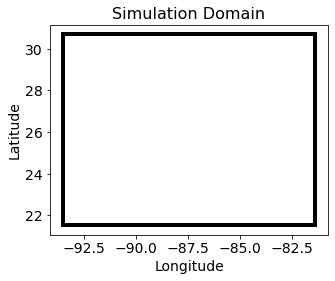

In [40]:
### Plot terrain
# Create figure and axes objects
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())

# Bound and fill in nice lines # comment this out if your cartopy isn't working
# ax.set_extent(MAP_BOUNDS1)
# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.OCEAN)

# Draw bounding box for inner domain
ax.plot((min_lon2, min_lon2), (min_lat2, max_lat2), lw=4, color='k')
ax.plot((max_lon2, max_lon2), (min_lat2, max_lat2), lw=4, color='k')
ax.plot((min_lon2, max_lon2), (min_lat2, min_lat2), lw=4, color='k')
ax.plot((min_lon2, max_lon2), (max_lat2, max_lat2), lw=4, color='k')

# Add important info to the plot
ax.set_title("Simulation Domain", fontsize=16)
ax.xaxis.set_visible(True)    # Set xaxis visible because cartopy hides it by default
ax.yaxis.set_visible(True)
ax.tick_params(labelsize=14)
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)

# Adjust figure height so the xlabel isn't cut off when saved
plt.gcf().subplots_adjust(bottom=0.15)

plt.savefig("domain.png")
plt.savefig("domain.pdf")

plt.show()

In [116]:
# Plot an interesting variable for this case
sd = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_sd/wrfout_d01_2005-08-28_00:00:00")
nd1 = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_nd/wrfout_d01_2005-08-28_00:00:00")
nd2 = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_nd/wrfout_d02_2005-08-28_00:00:00")

sd_wsp = sd['PSFC']/100
nd1_wsp = nd1['PSFC']/100
nd2_wsp = nd2['PSFC']/100

print(sd_wsp['XTIME'])
print(nd2_wsp['XTIME'])

<xarray.DataArray 'XTIME' (Time: 5)>
array(['2005-08-28T00:00:00.000000000', '2005-08-28T03:00:00.000000000',
       '2005-08-28T06:00:00.000000000', '2005-08-28T09:00:00.000000000',
       '2005-08-28T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    XTIME    (Time) datetime64[ns] 2005-08-28 ... 2005-08-28T12:00:00
Dimensions without coordinates: Time
Attributes:
    FieldType:    104
    MemoryOrder:  0  
    description:  minutes since 2005-08-28 00:00:00
    stagger:      
<xarray.DataArray 'XTIME' (Time: 11)>
array(['2005-08-28T00:00:00.000000000', '2005-08-28T01:00:00.000000000',
       '2005-08-28T02:00:00.000000000', '2005-08-28T03:00:00.000000000',
       '2005-08-28T04:00:00.000000000', '2005-08-28T05:00:00.000000000',
       '2005-08-28T06:00:00.000000000', '2005-08-28T07:00:00.000000000',
       '2005-08-28T08:00:00.000000000', '2005-08-28T09:00:00.000000000',
       '2005-08-28T10:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    XTIME    (Time) date

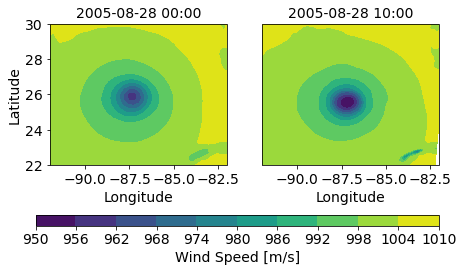

In [120]:
# Visualize variable of interest
## Set up the figure and axis, cartopy style

fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())

MAP_BOUNDS = [-92, -82, 22, 30]
ax1.set_extent(MAP_BOUNDS)
ax2.set_extent(MAP_BOUNDS)

## Set up colorbar values
ticks = np.linspace(950,1010,11)

# Filled-contour plots
im1 = ax1.contourf(longs1, lats1, sd_wsp.isel(Time=-1), ticks)
im2 = ax2.contourf(longs2, lats2, nd2_wsp.isel(Time=-1), ticks)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
cbar.set_label('Wind Speed [m/s]', fontsize=14)
cbar.ax.tick_params(labelsize=14)

ax1.xaxis.set_visible(True)
ax1.yaxis.set_visible(True)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Longitude", fontsize=14)
ax1.set_ylabel("Latitude", fontsize=14)
ax1.set_title(pd.to_datetime(sd_wsp['XTIME'].values[0]).strftime('%Y-%m-%d %H:%M'), fontsize=14)

ax2.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
ax2.tick_params(labelsize=14)
ax2.set_xlabel("Longitude", fontsize=14)
# ax2.set_ylabel("Latitude", fontsize=14)
ax2.set_title(pd.to_datetime(nd2_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M'), fontsize=14)

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("contours.png")
plt.savefig("contours.pdf")

plt.show()

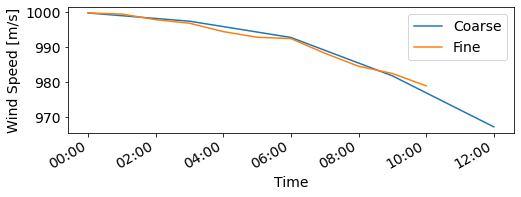

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))

ax.plot(sd['XTIME'], sd_wsp.isel(west_east=53, south_north=39), label='Coarse')
ax.plot(nd2['XTIME'], nd2_wsp.isel(west_east=58, south_north=52), label='Fine')
ax.legend(fontsize=14)

ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Wind Speed [m/s]", fontsize=14)
ax.tick_params(labelsize=14)


# Format the x-axis labels nicely
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig("timeseries.pdf")

plt.show()

In [9]:
print(sd_wsp)

<xarray.DataArray (Time: 5, south_north: 69, west_east: 97)>
array([[[3.0312734 , 2.9987397 , 3.0492997 , ..., 6.2124734 ,
         6.0414104 , 5.8927083 ],
        [2.9555926 , 3.009154  , 3.169308  , ..., 6.46189   ,
         6.2839894 , 6.121052  ],
        [2.9541698 , 3.0651696 , 3.26912   , ..., 6.7000265 ,
         6.5131645 , 6.336723  ],
        ...,
        [1.8505164 , 2.8028228 , 3.5800836 , ..., 5.7424445 ,
         6.002577  , 6.3191996 ],
        [0.9958203 , 3.1973097 , 4.9413314 , ..., 6.0894556 ,
         6.328325  , 6.561999  ],
        [2.1882315 , 3.407246  , 5.5424438 , ..., 6.363515  ,
         6.581762  , 6.744921  ]],

       [[3.4278924 , 3.4825318 , 3.5699542 , ..., 6.01583   ,
         5.881818  , 5.76694   ],
        [3.370395  , 3.3288913 , 3.5319057 , ..., 5.836606  ,
         5.7797303 , 5.846957  ],
        [3.3628154 , 3.268648  , 3.5129385 , ..., 5.9536867 ,
         5.8381996 , 5.929667  ],
...
        [1.7292585 , 2.1115003 , 2.6978922 , ..., 5.0973

In [176]:
# Plot an interesting variable for this case
sd = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_sd/wrfout_d01_2005-08-28_00:00:00")
nd1 = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_nd/wrfout_d01_2005-08-28_00:00:00")
nd2 = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_nd/wrfout_d02_2005-08-28_00:00:00")

sd2 = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_sd/wrfout_d01_2005-08-28_15:00:00")

sd_wsp = sd['PSFC']/100
sd_wsp2 = sd2['PSFC']/100

nd1_wsp = nd1['PSFC']/100
nd2_wsp = nd2['PSFC']/100

lats1 = nd1['XLAT'].isel(Time=0)    # Note: we must index-select Time=0 because plots expect 2D data (lat-lon)
longs1 = nd1['XLONG'].isel(Time=0)
lats2 = nd2['XLAT'].isel(Time=0)
longs2 = nd2['XLONG'].isel(Time=0)

lats3 = nd1['XLAT'].isel(Time=0)
longs3 = nd1['XLONG'].isel(Time=0)

print(sd_wsp['XTIME'])
print(nd1_wsp['XTIME'])
print(nd2_wsp['XTIME'])

<xarray.DataArray 'XTIME' (Time: 5)>
array(['2005-08-28T00:00:00.000000000', '2005-08-28T03:00:00.000000000',
       '2005-08-28T06:00:00.000000000', '2005-08-28T09:00:00.000000000',
       '2005-08-28T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    XTIME    (Time) datetime64[ns] 2005-08-28 ... 2005-08-28T12:00:00
Dimensions without coordinates: Time
Attributes:
    FieldType:    104
    MemoryOrder:  0  
    description:  minutes since 2005-08-28 00:00:00
    stagger:      
<xarray.DataArray 'XTIME' (Time: 4)>
array(['2005-08-28T00:00:00.000000000', '2005-08-28T03:00:00.000000000',
       '2005-08-28T06:00:00.000000000', '2005-08-28T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    XTIME    (Time) datetime64[ns] 2005-08-28 ... 2005-08-28T09:00:00
Dimensions without coordinates: Time
Attributes:
    FieldType:    104
    MemoryOrder:  0  
    description:  minutes since 2005-08-28 00:00:00
    stagger:      
<xarray.DataArray 'XTIME' (Time: 11)>
array(

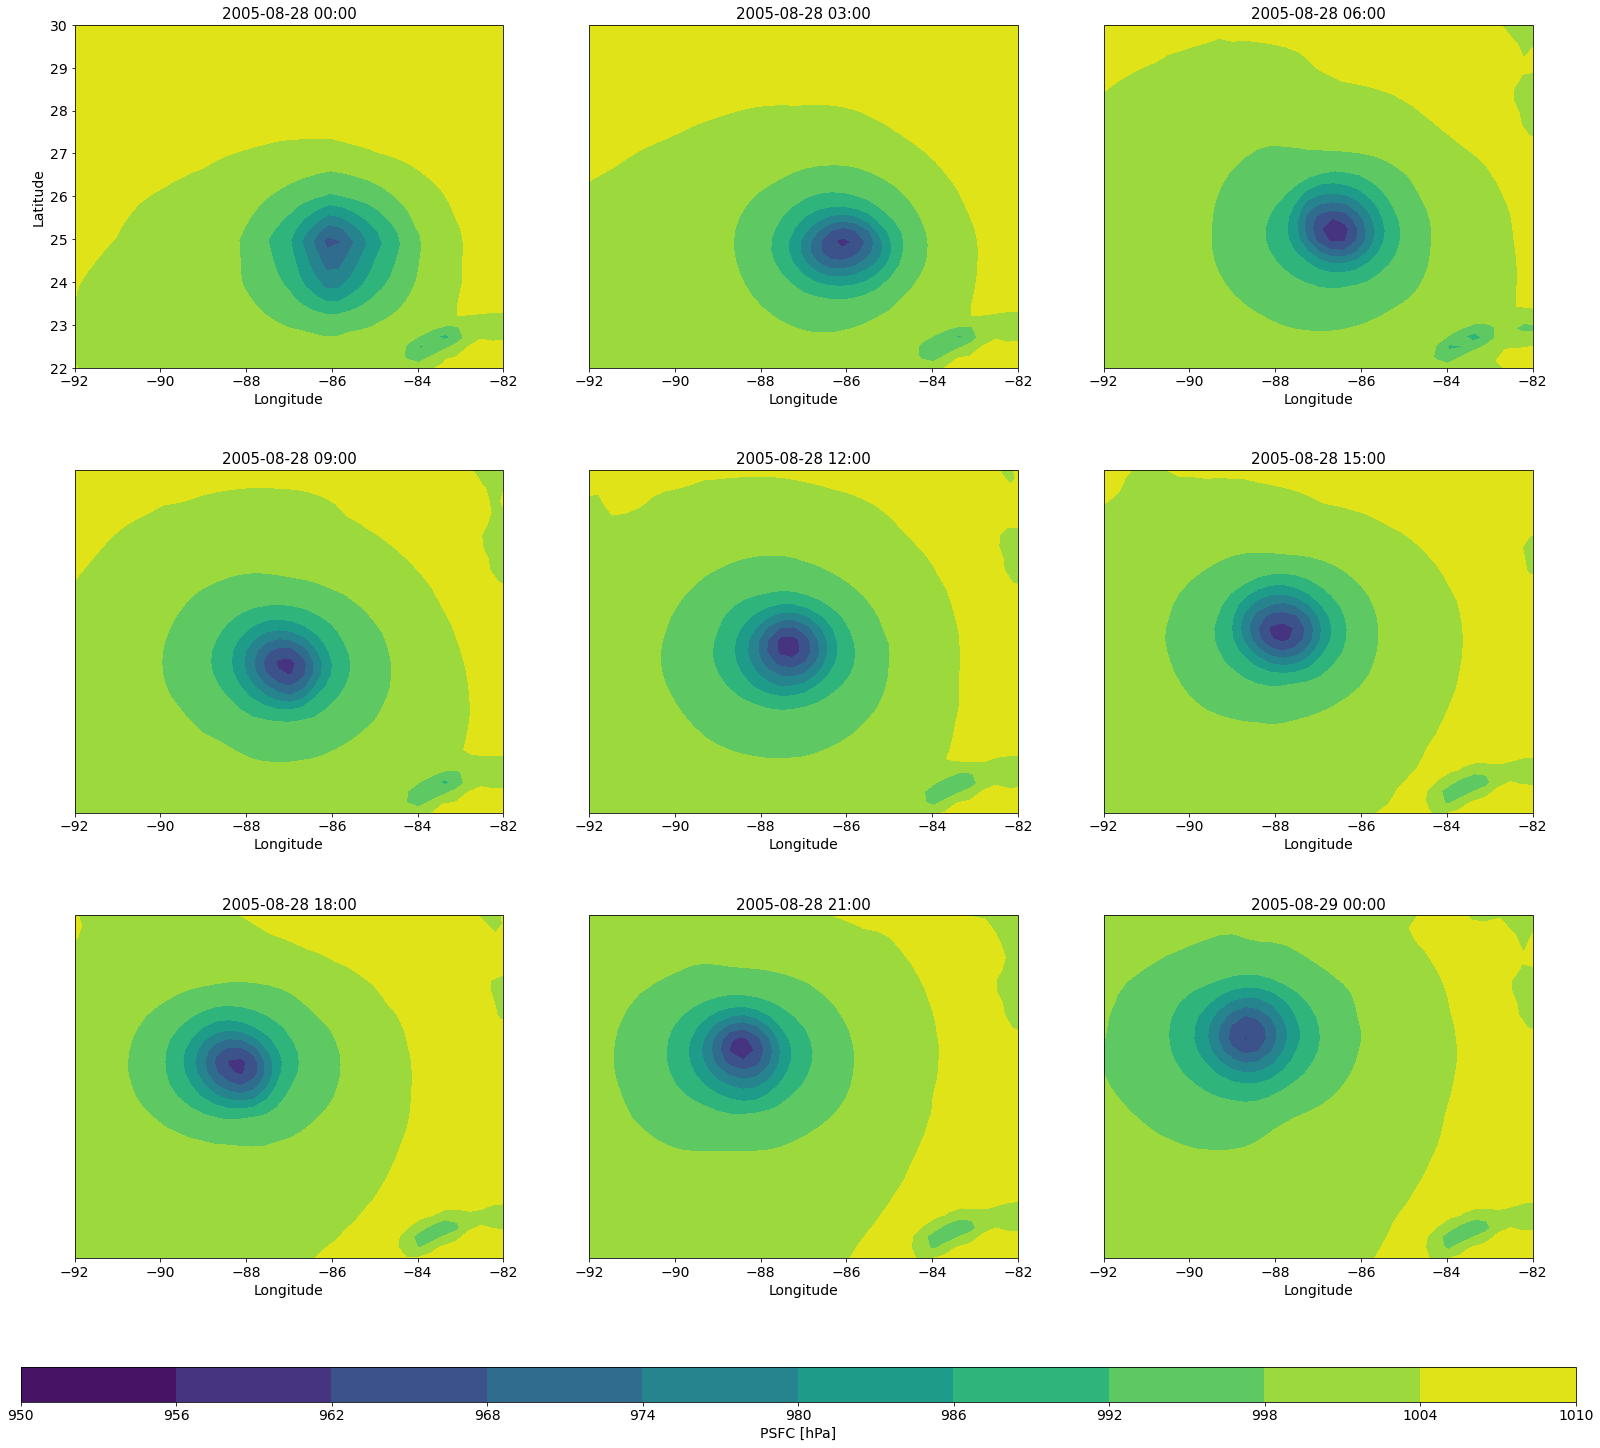

In [202]:
# Visualize variable of interest
## Set up the figure and axis, cartopy style

fig = plt.figure(figsize=(30,24))

ax1 = fig.add_subplot(3,3,1, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(3,3,2, projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(3,3,3, projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(3,3,4, projection=ccrs.PlateCarree())
ax5 = fig.add_subplot(3,3,5, projection=ccrs.PlateCarree())
ax6 = fig.add_subplot(3,3,6, projection=ccrs.PlateCarree())
ax7 = fig.add_subplot(3,3,7, projection=ccrs.PlateCarree())
ax8 = fig.add_subplot(3,3,8, projection=ccrs.PlateCarree())
ax9 = fig.add_subplot(3,3,9, projection=ccrs.PlateCarree())

MAP_BOUNDS = [-92, -82, 22, 30]
ax1.set_extent(MAP_BOUNDS)
ax2.set_extent(MAP_BOUNDS)
ax3.set_extent(MAP_BOUNDS)
ax4.set_extent(MAP_BOUNDS)
ax5.set_extent(MAP_BOUNDS)
ax6.set_extent(MAP_BOUNDS)
ax7.set_extent(MAP_BOUNDS)
ax8.set_extent(MAP_BOUNDS)
ax9.set_extent(MAP_BOUNDS)

## Set up colorbar values
ticks = np.linspace(950,1010,11)

# Filled-contour plots
im1 = ax1.contourf(longs1, lats1, sd_wsp.isel(Time=0), ticks)
im2 = ax2.contourf(longs1, lats1, sd_wsp.isel(Time=1), ticks)
im3 = ax3.contourf(longs1, lats1, sd_wsp.isel(Time=2), ticks)
im4 = ax4.contourf(longs1, lats1, sd_wsp.isel(Time=3), ticks)
im5 = ax5.contourf(longs1, lats1, sd_wsp.isel(Time=4), ticks)
im6 = ax6.contourf(longs1, lats1, sd_wsp2.isel(Time=0), ticks)
im7 = ax7.contourf(longs1, lats1, sd_wsp2.isel(Time=1), ticks)
im8 = ax8.contourf(longs1, lats1, sd_wsp2.isel(Time=2), ticks)
im9 = ax9.contourf(longs1, lats1, sd_wsp2.isel(Time=3), ticks)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.1, 0.075, 0.72, 0.02])
cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
cbar.set_label('PSFC [hPa]', fontsize=14)
cbar.ax.tick_params(labelsize=14)

ax1.xaxis.set_visible(True)
ax1.yaxis.set_visible(True)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Longitude", fontsize=14)
ax1.set_ylabel("Latitude", fontsize=14)
ax1.set_title(pd.to_datetime(sd_wsp['XTIME'].values[0]).strftime('%Y-%m-%d %H:%M'), fontsize=15)

ax2.xaxis.set_visible(True)
ax2.tick_params(labelsize=14)
ax2.set_xlabel("Longitude", fontsize=14)
ax2.set_title(pd.to_datetime(sd_wsp['XTIME'].values[1]).strftime('%Y-%m-%d %H:%M'), fontsize=15)

ax3.xaxis.set_visible(True)
ax3.tick_params(labelsize=14)
ax3.set_xlabel("Longitude", fontsize=14)
ax3.set_title(pd.to_datetime(sd_wsp['XTIME'].values[2]).strftime('%Y-%m-%d %H:%M'), fontsize=15)

ax4.xaxis.set_visible(True)
ax4.tick_params(labelsize=14)
ax4.set_xlabel("Longitude", fontsize=14)
ax4.set_xlabel("Longitude", fontsize=14)
ax4.set_title(pd.to_datetime(sd_wsp['XTIME'].values[3]).strftime('%Y-%m-%d %H:%M'), fontsize=15)

ax5.xaxis.set_visible(True)
ax5.tick_params(labelsize=14)
ax5.set_xlabel("Longitude", fontsize=14)
ax5.set_title(pd.to_datetime(sd_wsp['XTIME'].values[4]).strftime('%Y-%m-%d %H:%M'), fontsize=15)

ax6.xaxis.set_visible(True)
ax6.tick_params(labelsize=14)
ax6.set_xlabel("Longitude", fontsize=14)
ax6.set_title(pd.to_datetime(sd_wsp2['XTIME'].values[0]).strftime('%Y-%m-%d %H:%M'), fontsize=15)

ax7.xaxis.set_visible(True)
ax7.tick_params(labelsize=14)
ax7.set_xlabel("Longitude", fontsize=14)
ax7.set_xlabel("Longitude", fontsize=14)
ax7.set_title(pd.to_datetime(sd_wsp2['XTIME'].values[1]).strftime('%Y-%m-%d %H:%M'), fontsize=15)

ax8.xaxis.set_visible(True)
ax8.tick_params(labelsize=14)
ax8.set_xlabel("Longitude", fontsize=14)
ax8.set_title(pd.to_datetime(sd_wsp2['XTIME'].values[2]).strftime('%Y-%m-%d %H:%M'), fontsize=15)

ax9.xaxis.set_visible(True)
ax9.tick_params(labelsize=14)
ax9.set_xlabel("Longitude", fontsize=14)
ax9.set_title(pd.to_datetime(sd_wsp2['XTIME'].values[3]).strftime('%Y-%m-%d %H:%M'), fontsize=15)

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("contours_sd.png")
plt.savefig("contours_sd.pdf")

plt.show()

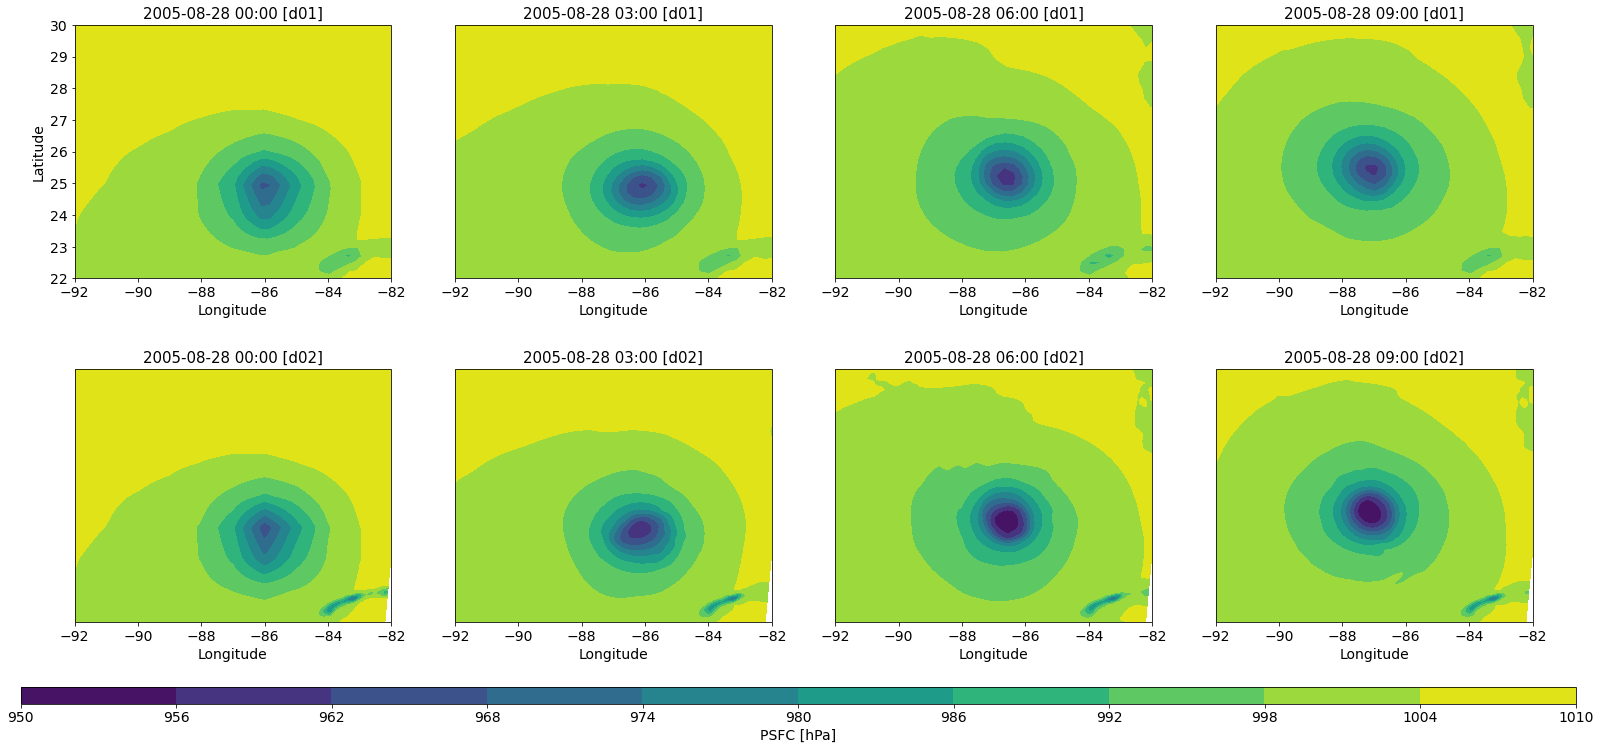

In [203]:
# Visualize variable of interest
## Set up the figure and axis, cartopy style

fig = plt.figure(figsize=(30,12))

ax1 = fig.add_subplot(2,4,1, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(2,4,2, projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(2,4,3, projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(2,4,4, projection=ccrs.PlateCarree())
ax5 = fig.add_subplot(2,4,5, projection=ccrs.PlateCarree())
ax6 = fig.add_subplot(2,4,6, projection=ccrs.PlateCarree())
ax7 = fig.add_subplot(2,4,7, projection=ccrs.PlateCarree())
ax8 = fig.add_subplot(2,4,8, projection=ccrs.PlateCarree())

MAP_BOUNDS = [-92, -82, 22, 30]
ax1.set_extent(MAP_BOUNDS)
ax2.set_extent(MAP_BOUNDS)
ax3.set_extent(MAP_BOUNDS)
ax4.set_extent(MAP_BOUNDS)
ax5.set_extent(MAP_BOUNDS)
ax6.set_extent(MAP_BOUNDS)
ax7.set_extent(MAP_BOUNDS)
ax8.set_extent(MAP_BOUNDS)

## Set up colorbar values
ticks = np.linspace(950,1010,11)

# Filled-contour plots
im1 = ax1.contourf(longs3, lats3, nd1_wsp.isel(Time=0), ticks)
im2 = ax2.contourf(longs3, lats3, nd1_wsp.isel(Time=1), ticks)
im3 = ax3.contourf(longs3, lats3, nd1_wsp.isel(Time=2), ticks)
im4 = ax4.contourf(longs3, lats3, nd1_wsp.isel(Time=3), ticks)
im4 = ax5.contourf(longs2, lats2, nd2_wsp.isel(Time=0), ticks)
im4 = ax6.contourf(longs2, lats2, nd2_wsp.isel(Time=3), ticks)
im4 = ax7.contourf(longs2, lats2, nd2_wsp.isel(Time=6), ticks)
im4 = ax8.contourf(longs2, lats2, nd2_wsp.isel(Time=9), ticks)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.1, 0.075, 0.72, 0.02])
cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
cbar.set_label('PSFC [hPa]', fontsize=14)
cbar.ax.tick_params(labelsize=14)

ax1.xaxis.set_visible(True)
ax1.yaxis.set_visible(True)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Longitude", fontsize=14)
ax1.set_ylabel("Latitude", fontsize=14)
ax1.set_title(pd.to_datetime(nd1_wsp['XTIME'].values[0]).strftime('%Y-%m-%d %H:%M' +  ' [d01]'), fontsize=15)

ax2.xaxis.set_visible(True)
ax2.tick_params(labelsize=14)
ax2.set_xlabel("Longitude", fontsize=14)
ax2.set_title(pd.to_datetime(nd1_wsp['XTIME'].values[1]).strftime('%Y-%m-%d %H:%M' +  ' [d01]'), fontsize=15)

ax3.xaxis.set_visible(True)
ax3.tick_params(labelsize=14)
ax3.set_xlabel("Longitude", fontsize=14)
ax3.set_title(pd.to_datetime(nd1_wsp['XTIME'].values[2]).strftime('%Y-%m-%d %H:%M' +  ' [d01]'), fontsize=15)

ax4.xaxis.set_visible(True)
ax4.tick_params(labelsize=14)
ax4.set_xlabel("Longitude", fontsize=14)
ax4.set_title(pd.to_datetime(nd1_wsp['XTIME'].values[3]).strftime('%Y-%m-%d %H:%M' +  ' [d01]'), fontsize=15)

ax5.xaxis.set_visible(True)
ax5.tick_params(labelsize=14)
ax5.set_xlabel("Longitude", fontsize=14)
ax5.set_ylabel("Latitude", fontsize=14)
ax5.set_title(pd.to_datetime(nd2_wsp['XTIME'].values[0]).strftime('%Y-%m-%d %H:%M' +  ' [d02]'), fontsize=15)

ax6.xaxis.set_visible(True)
ax6.tick_params(labelsize=14)
ax6.set_xlabel("Longitude", fontsize=14)
ax6.set_title(pd.to_datetime(nd2_wsp['XTIME'].values[3]).strftime('%Y-%m-%d %H:%M' +  ' [d02]'), fontsize=15)

ax7.xaxis.set_visible(True)
ax7.tick_params(labelsize=14)
ax7.set_xlabel("Longitude", fontsize=14)
ax7.set_title(pd.to_datetime(nd2_wsp['XTIME'].values[6]).strftime('%Y-%m-%d %H:%M' +  ' [d02]'), fontsize=15)

ax8.xaxis.set_visible(True)
ax8.tick_params(labelsize=14)
ax8.set_xlabel("Longitude", fontsize=14)
ax8.set_title(pd.to_datetime(nd2_wsp['XTIME'].values[9]).strftime('%Y-%m-%d %H:%M' +  ' [d02]'), fontsize=15)

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("contours_nd.png")
plt.savefig("contours_nd.pdf")

plt.show()

In [204]:
# Plot an interesting variable for this case
nd1 = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_nd/wrfout_d01_2005-08-28_00:00:00")
nd2 = xr.open_dataset("/projects/jiko1138/ATOC_NWP/ICA_06/Katrina_nd/wrfout_d02_2005-08-28_00:00:00")
nd1_wsp = nd1['PSFC']/100
nd2_wsp = nd2['PSFC']/100

<xarray.DataArray 'PSFC' ()>
array(1006.0479, dtype=float32)
Coordinates:
    XLAT     float32 ...
    XLONG    float32 ...
    XTIME    datetime64[ns] 2005-08-28


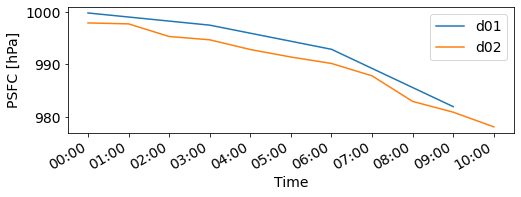

In [210]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))


print(nd1_wsp[0,0,53])

ax.plot(nd1['XTIME'], nd1_wsp.isel(west_east=53, south_north=39), label='d01')
ax.plot(nd2['XTIME'], nd2_wsp.isel(west_east=53, south_north=39), label='d02')
ax.legend(fontsize=14)

ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("PSFC [hPa]", fontsize=14)
ax.tick_params(labelsize=14)


# Format the x-axis labels nicely
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig("timeseries.png")

plt.show()

In [29]:
# Plot an interesting variable for this case
sd = xr.open_dataset("/projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_18:00:00")
nd1 = xr.open_dataset("/projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-29_21:00:00")
nd2 = xr.open_dataset("/projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-30_00:00:00")
nd3 = xr.open_dataset("/projects/jiko1138/ATOC_3030/Project/Ida/Simulation#1/wrfout_d01_2021-08-30_03:00:00")

sd_wsp = ((sd['U10']**2)+(sd['V10']**2))**0.5
nd1_wsp = ((nd1['U10']**2)+(nd1['V10']**2))**0.5
nd2_wsp = ((nd2['U10']**2)+(nd2['V10']**2))**0.5
nd3_wsp = ((nd3['U10']**2)+(nd3['V10']**2))**0.5

In [30]:
print(sd_wsp['XTIME'])

<xarray.DataArray 'XTIME' (Time: 1)>
array(['2021-08-29T18:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    XTIME    (Time) datetime64[ns] 2021-08-29T18:00:00
Dimensions without coordinates: Time
Attributes:
    FieldType:    104
    MemoryOrder:  0  
    description:  minutes since 2021-08-22 00:00:00
    stagger:      


In [31]:
lats1 = nd1['XLAT'].isel(Time=0)    # Note: we must index-select Time=0 because plots expect 2D data (lat-lon)
longs1 = nd1['XLONG'].isel(Time=0)
lats2 = nd2['XLAT'].isel(Time=0)
longs2 = nd2['XLONG'].isel(Time=0)

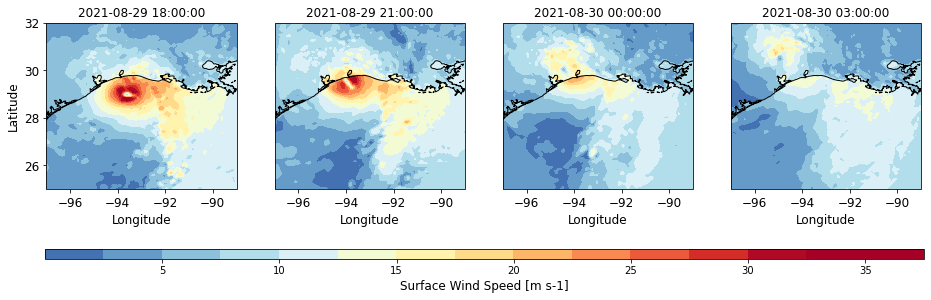

In [85]:
# Visualize variable of interest
## Set up the figure and axis, cartopy style

fig = plt.figure(figsize=(18,4.5))

ax1 = fig.add_subplot(1,4,1, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(1,4,2, projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(1,4,3, projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(1,4,4, projection=ccrs.PlateCarree())

MAP_BOUNDS = [-97, -89, 25, 32]
ax1.set_extent(MAP_BOUNDS)
ax1.add_feature(cfeature.COASTLINE)

ax2.set_extent(MAP_BOUNDS)
ax2.add_feature(cfeature.COASTLINE)

ax3.set_extent(MAP_BOUNDS)
ax3.add_feature(cfeature.COASTLINE)

ax4.set_extent(MAP_BOUNDS)
ax4.add_feature(cfeature.COASTLINE)

## Set up colorbar values
ticks = np.arange(0, 40, 2.5)

# Filled-contour plots
im1 = ax1.contourf(longs1, lats1, sd_wsp.isel(Time=-1), ticks, cmap=plt.cm.RdYlBu_r)
im2 = ax2.contourf(longs2, lats2, nd1_wsp.isel(Time=-1), ticks, cmap=plt.cm.RdYlBu_r)
im3 = ax3.contourf(longs2, lats2, nd2_wsp.isel(Time=-1), ticks, cmap=plt.cm.RdYlBu_r)
im4 = ax4.contourf(longs2, lats2, nd3_wsp.isel(Time=-1), ticks, cmap=plt.cm.RdYlBu_r)

im1.set_clim(-2, 32) 
im2.set_clim(-2, 32) 
im3.set_clim(-2, 32) 
im4.set_clim(-2, 32) 

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.124, 0.03, 0.678, 0.03])
cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal") 
cbar.set_ticks([5,10,15,20,25,30,35])
cbar.set_label("Surface Wind Speed [m s-1]", fontsize=12)

ax1.xaxis.set_visible(True)
ax1.yaxis.set_visible(True)
ax1.tick_params(labelsize=12)
ax1.set_xlabel("Longitude", fontsize=12)
ax1.set_ylabel("Latitude", fontsize=12)
ax1.set_title('2021-08-29 18:00:00', fontsize=12)

ax2.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
ax2.tick_params(labelsize=12)
ax2.set_xlabel("Longitude", fontsize=12)
# ax2.set_ylabel("Latitude", fontsize=12)
ax2.set_title('2021-08-29 21:00:00', fontsize=12)

ax3.xaxis.set_visible(True)
#ax3.yaxis.set_visible(True)
ax3.tick_params(labelsize=12)
ax3.set_ylabel("Latitude", fontsize=12)
ax3.set_xlabel("Longitude", fontsize=12)
# ax2.set_ylabel("Latitude", fontsize=12)
ax3.set_title('2021-08-30 00:00:00', fontsize=12)

ax4.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
ax4.tick_params(labelsize=12)
ax4.set_xlabel("Longitude", fontsize=12)
# ax2.set_ylabel("Latitude", fontsize=12)
ax4.set_title('2021-08-30 03:00:00', fontsize=12)

plt.show()